# Flight Price Prediction

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


# Importing dataset

1. Since data is in form of excel file we have to use pandas read_excel to load the data.

2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row.

3. Check whether any null values are there or not. if it is present then following can be done,

   A.Imputing data using Imputation method in sklearn.

   B.Filling NaN values with mean, median and mode using fillna() method.
   

4. Describe data --> which can give statistical analysis.

In [2]:
#reading the dataset
data=pd.read_excel("Data_Train.xlsx")

In [3]:
data

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

In [4]:
data.shape

(10683, 11)

In [5]:
#finding null value
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
#dropping null value
data.dropna(inplace=True)

In [7]:
#data after removing null value
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
#description of the data
data.describe()

Price
count  10682.000000
mean    9087.214567
std     4611.548810
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


# EDA & Feature Engineering

we have various features for preprocessing for our target value like:-.

1.Duration

2.Departure and Arrival time

3.Date of journey

4.Total stops

5.Additional info

6.Airline

7.Source and destination

8.Route

# Handling Object Data

Duration, Dep_Time, Arrival_Time, Date_of_journey, are object datatype. To derive numeric features on these, we use pandas to_datetime method to convert object data type to datetime datatype.

Attribute .dt.day will extract day from the date

Attribute .dt.month will extract month from that date

# Duration

In [11]:
# Time taken by plane to reach destination is called Duration
# Function to convert duration string to hours

def convert_duration_to_hours(duration_str):
    hours, minutes = 0, 0
    if 'h' in duration_str:
        hours = int(duration_str.split('h')[0])
        duration_str = duration_str.split('h')[1]
    if 'm' in duration_str:
        minutes = int(duration_str.split('m')[0])
    return hours + minutes / 60

# Apply the conversion function to the duration column
data['Duration_Hours'] = data['Duration'].apply(convert_duration_to_hours)

In [12]:
data.drop(['Duration'],axis=1,inplace=True)

In [13]:
data[['Duration_Hours']]

Duration_Hours
0            2.833333
1            7.416667
2           19.000000
3            5.416667
4            4.750000
...               ...
10678        2.500000
10679        2.583333
10680        3.000000
10681        2.666667
10682        8.333333

[10682 rows x 1 columns]

# Departure Time and Arrival Time

In [14]:
# Departure time is when a plane leaves the gate. 

# Extracting Hours
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour

# Extracting Minutes
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
data.drop(["Dep_Time"], axis = 1, inplace = True)

In [15]:
# Arrival time is when the plane pulls up to the gate.

# Extracting Hours
data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour

# Extracting Minutes
data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [16]:
data[["Dep_hour","Dep_min","Arrival_hour","Arrival_min"]]

Dep_hour  Dep_min  Arrival_hour  Arrival_min
0            22       20             1           10
1             5       50            13           15
2             9       25             4           25
3            18        5            23           30
4            16       50            21           35
...         ...      ...           ...          ...
10678        19       55            22           25
10679        20       45            23           20
10680         8       20            11           20
10681        11       30            14           10
10682        10       55            19           15

[10682 rows x 4 columns]

# Date of Journey

In [17]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-09-06     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-12-05   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-01-03  Banglore   New Delhi        BLR → NAG → DEL   

  Total_Stops Additional_Info  Price  Duration_Hours  Dep_hour  Dep_min  \
0    non-stop         No info   3897        2.833333        22       20   
1     2 stops         No info   7662        7.416667         5       50   
2     2 stops         No info  13882       19.000000         9       25   
3      1 stop         No info   6218        5.416667        18        5   
4      1 stop         No info  13302        4.750000        16       50   

   Arrival_hour  Arrival_min  
0             1           10  
1            13           15  
2             4           25  
3            23           30  
4            21           35

In [18]:
data['Date_of_Journey'].dt.year.unique()

array([2019], dtype=int64)

In [19]:
data["Journey_day"] = pd.to_datetime(data["Date_of_Journey"], format="%d/%m/%Y").dt.day
data["Journey_month"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [20]:
data[["Journey_day","Journey_month"]]

Journey_day  Journey_month
0               24              3
1                5              1
2                6              9
3                5             12
4                3              1
...            ...            ...
10678            4              9
10679           27              4
10680           27              4
10681            3              1
10682            5              9

[10682 rows x 2 columns]

In [21]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

data.drop(["Date_of_Journey"], axis = 1, inplace = True)

#  Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,


Nominal data  >  data are not in any order  >  OneHotEncoder is used in this case

> Airline , Source , Destination , Route , Additional_info


Ordinal data  >  data are in order  >  LabelEncoder is used in this case

> Total_Stops

# Route and Additional info

In [22]:
data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [23]:
data['Additional_Info'].sample(100)

196     No info
4328    No info
5813    No info
9295    No info
4154    No info
         ...   
1911    No info
3835    No info
6345    No info
9810    No info
6915    No info
Name: Additional_Info, Length: 100, dtype: object

In [24]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Total_Stops

In [25]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [26]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [27]:
# Here Values are assigned with corresponding keys

data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [28]:
data[["Total_Stops"]]

Total_Stops
0                0
1                2
2                2
3                1
4                1
...            ...
10678            0
10679            0
10680            0
10681            0
10682            2

[10682 rows x 1 columns]

# Airline

In [29]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

CATPLOT OF FLIGHT PRICE BY AIRLINE

This code generates a categorical plot (catplot) using Seaborn to visualize the relationship between flight prices and airlines. Let's break down how the code works:

1. sns.catplot() Function :
   - `sns.catplot()` is a function from the Seaborn library used to create categorical plots.
   - It is a high-level interface for creating various types of categorical plots.
   - In this code, `sns.catplot()` is used to create the visualization.

2. Arguments :
   - `y="Price"`: Specifies the variable to be plotted on the y-axis. In this case, it's the flight prices.
   - `x="Airline"`: Specifies the variable to be plotted on the x-axis. Here, it's the airline names.
   - `data=data.sort_values("Price", ascending=False)`: Specifies the DataFrame to be used for plotting. The data is sorted by price in descending order, ensuring that the point plot shows airlines with higher prices at the top.
   - `kind=Boxen and Bar`: Specifies the type of categorical plot to create. In this case, it's a point plot. Point plots are used to show point estimates and confidence intervals using scatterplot glyphs.
   - `height=6`: Specifies the height of the plot in inches.
   - `aspect=3`: Specifies the aspect ratio of the plot. It controls the width-to-height ratio of the plot.

3. plt.show() :
   - Displays the plot.

Overall, the code generates a point plot to visualize the relationship between flight prices and airlines. Each point represents a data point (price) for a specific airline. The points are connected by lines to show trends or patterns in the data. This visualization helps in understanding how prices vary across different airlines and if there are any noticeable trends or patterns.

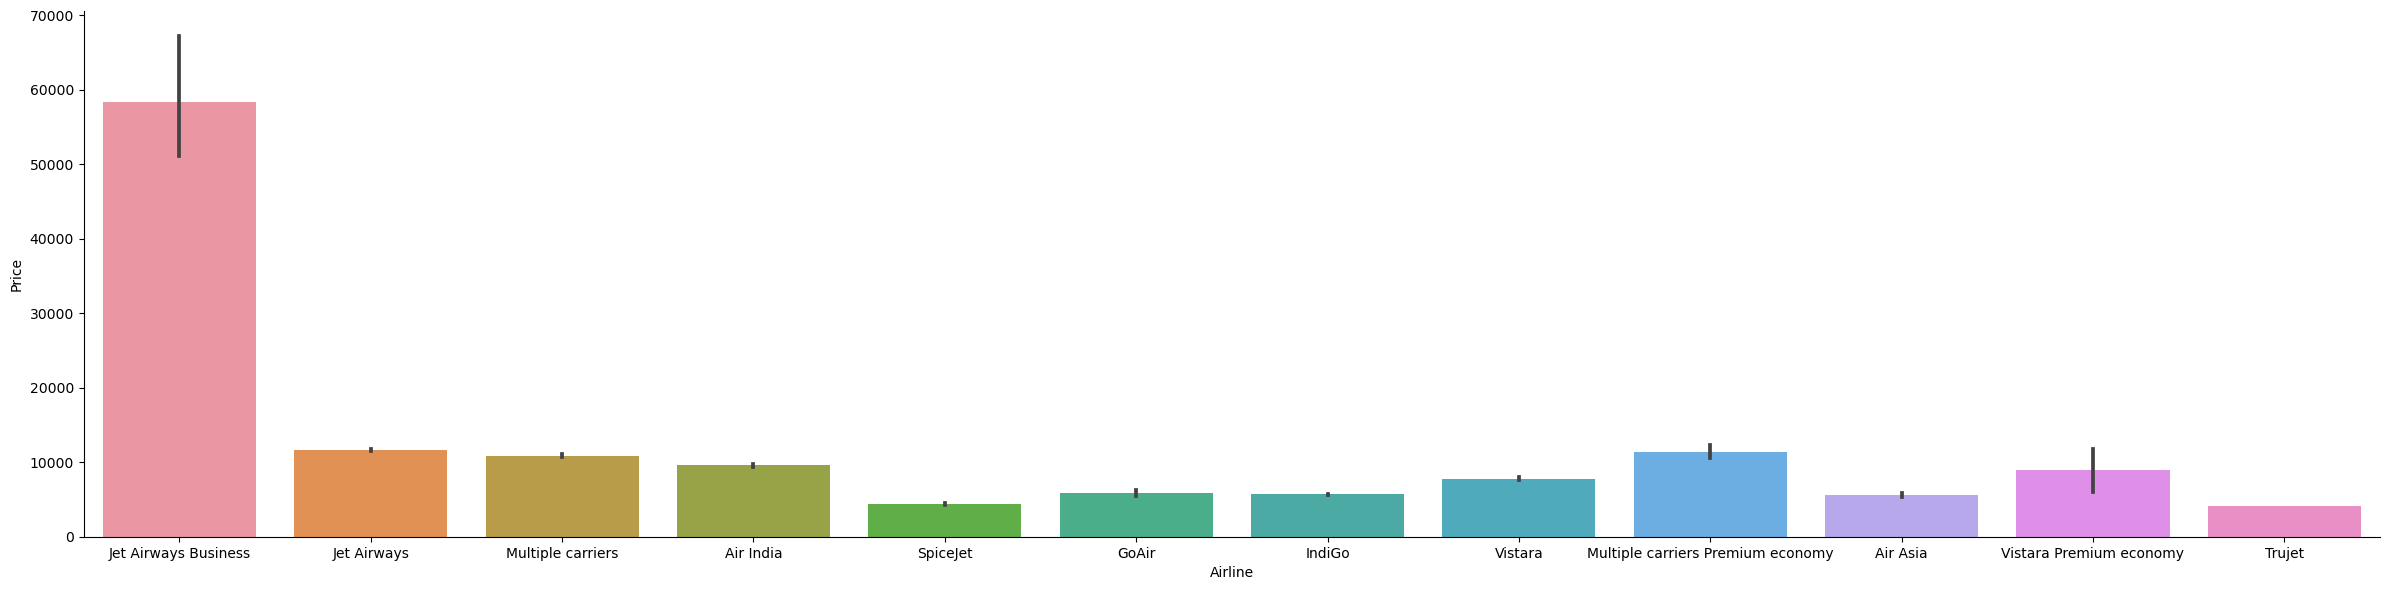

In [30]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="bar", height = 6, aspect = 4)
plt.show()

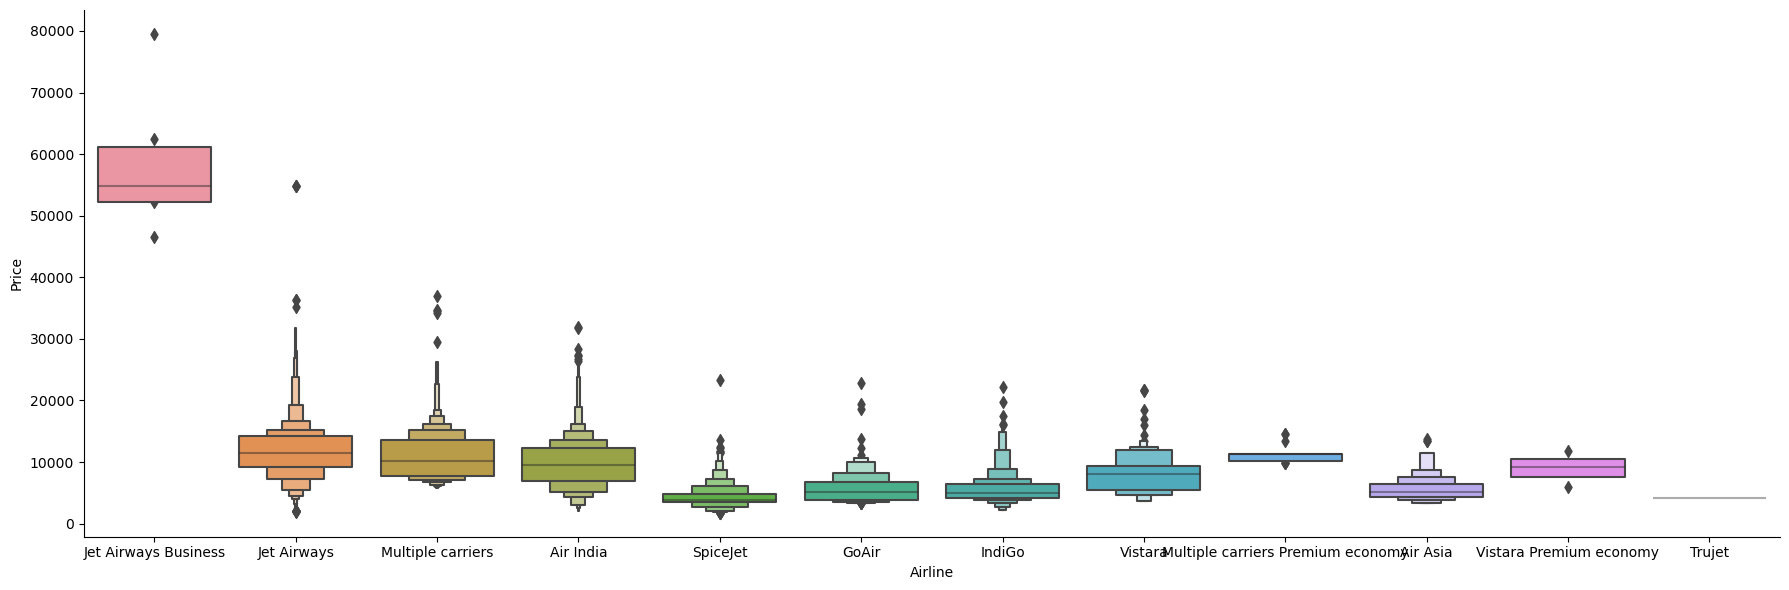

In [31]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [32]:
data.groupby('Airline').describe()['Price'].sort_values('mean',ascending=False)

count          mean           std  \
Airline                                                                 
Jet Airways Business                  6.0  58358.666667  11667.596748   
Jet Airways                        3849.0  11643.923357   4258.940578   
Multiple carriers Premium economy    13.0  11418.846154   1717.153936   
Multiple carriers                  1196.0  10902.678094   3721.234997   
Air India                          1751.0   9612.427756   3901.734561   
Vistara Premium economy               3.0   8962.333333   2915.405518   
Vistara                             479.0   7796.348643   2914.298578   
GoAir                               194.0   5861.056701   2703.585767   
IndiGo                             2053.0   5673.682903   2264.142168   
Air Asia                            319.0   5590.260188   2027.362290   
SpiceJet                            818.0   4338.284841   1849.922514   
Trujet                                1.0   4140.000000           NaN   

                                       min      25%      50%       75%  \
Airline                                                                  
Jet Airways Business               46490.0  52243.0  54747.0  61122.50   
Jet Airways                         1840.0   9134.0  11467.0  14151.00   
Multiple carriers Premium economy   9845.0  10161.0  11269.0  11269.00   
Multiple carriers                   5797.0   7723.0  10197.0  13587.00   
Air India                           2050.0   6891.0   9443.0  12219.00   
Vistara Premium economy             5969.0   7547.0   9125.0  10459.00   
Vistara                             3687.0   5403.0   7980.0   9345.00   
GoAir                               3398.0   3898.0   5135.0   6811.25   
IndiGo                              2227.0   4226.0   5000.0   6494.00   
Air Asia                            3383.0   4282.0   5162.0   6451.00   
SpiceJet                            1759.0   3574.5   3873.0   4760.00   
Trujet                              4140.0   4140.0   4140.0   4140.00   

                                       max  
Airline                                     
Jet Airways Business               79512.0  
Jet Airways                        54826.0  
Multiple carriers Premium economy  14629.0  
Multiple carriers                  36983.0  
Air India                          31945.0  
Vistara Premium economy            11793.0  
Vistara                            21730.0  
GoAir                              22794.0  
IndiGo                             22153.0  
Air Asia                           13774.0  
SpiceJet                           23267.0  
Trujet                              4140.0

HEATMAP OF FLIGHT PRICE BY AIRLINE

This code will create a heatmap visualization representing the distribution of Flight Prices by Airline. Let's break down how the code works:

1. **Pivot Table Creation**:
   - The `pivot_table()` function is used to create a pivot table from the `data` DataFrame.
   - The index of the pivot table is set to the 'Airline' column, representing different airlines.
   - The columns of the pivot table are created using `pd.cut()` to bin the 'Price' column into 10 equally spaced intervals. Each interval represents a price range.
   - The `aggfunc='size'` parameter specifies that we want to count the number of flights falling into each price range for each airline.
   - `fill_value=0` ensures that if there are no flights in a particular price range for an airline, it will be filled with 0.

2. **Heatmap Creation**:
   - The `heatmap_data` pivot table created above is used as input for creating the heatmap.
   - Seaborn's `heatmap()` function is used to create the heatmap visualization.
   - The `cmap='YlGnBu'` parameter specifies the color map for the heatmap.
   - `annot=True` displays the numeric values (counts) within each cell of the heatmap.
   - `fmt='g'` specifies the format for the annotations (counts) as standard decimal numbers.
   - `cbar_kws={'label': 'Number of Flights'}` adds a label to the color bar indicating the meaning of the color scale.
   - The title, xlabel, and ylabel are set to provide context to the visualization.

Overall, the heatmap will show the distribution of flight prices for each airline, allowing you to visually analyze how prices vary across different airlines and price ranges. Darker cells indicate a higher number of flights within that price range for a particular airline, while lighter cells indicate fewer flights.

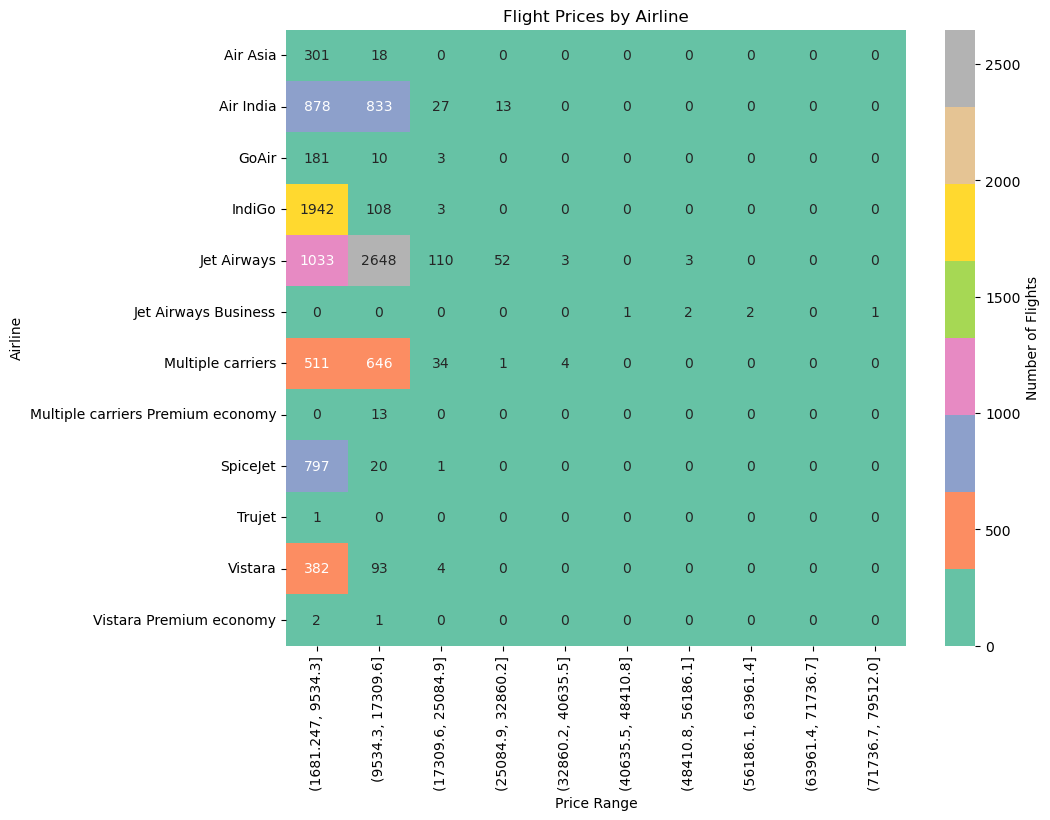

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table to count the number of flights for each airline and price range
heatmap_data = data.pivot_table(index='Airline', columns=pd.cut(data['Price'], bins=10), aggfunc='size', fill_value=0)

# Create the heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='Set2', annot=True, fmt='g', cbar_kws={'label': 'Number of Flights'})
plt.title('Flight Prices by Airline')
plt.xlabel('Price Range')
plt.ylabel('Airline')
plt.show()


# Source

In [34]:
data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

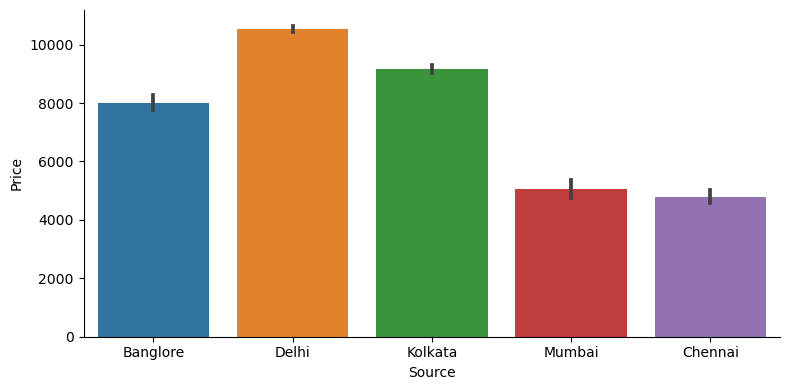

In [35]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="bar", height = 4, aspect = 2)
plt.show()

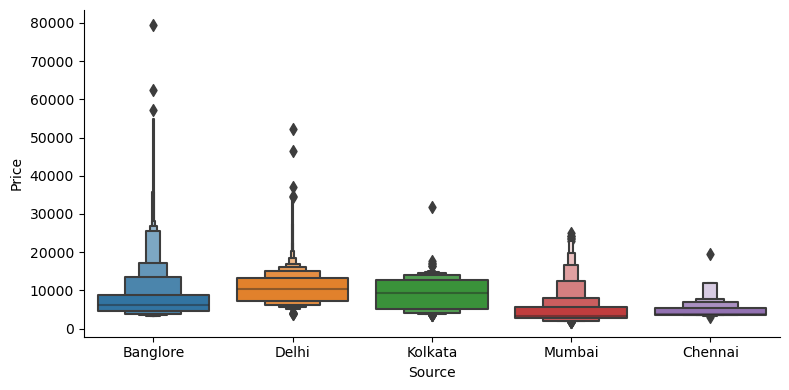

In [36]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 2)
plt.show()

HEATMAP OF FLIGHT PRICE BY SOURCE

This code will create a heatmap visualization representing the distribution of flight prices by source. Let's break down how the code works:

1. **Pivot Table Creation**:
   - The `pivot_table()` function is used to create a pivot table from the `data` DataFrame.
   - The index of the pivot table is set to the 'Source' column, which likely represents the source airports.
   - The columns of the pivot table are created using `pd.cut()` to bin the 'Price' column into 10 equally spaced intervals. Each interval represents a price range.
   - The `aggfunc='size'` parameter specifies that we want to count the number of flights falling into each price range for each source.
   - `fill_value=0` ensures that if there are no flights in a particular price range for a source, it will be filled with 0.

2. **Heatmap Creation**:
   - The `heatmap_data` pivot table created above is used as input for creating the heatmap.
   - Seaborn's `heatmap()` function is used to create the heatmap visualization.
   - The `cmap='YlGnBu'` parameter specifies the color map for the heatmap.
   - `annot=True` displays the numeric values (counts) within each cell of the heatmap.
   - `fmt='g'` specifies the format for the annotations (counts) as standard decimal numbers.
   - `cbar_kws={'label': 'Number of Flights'}` adds a label to the color bar indicating the meaning of the color scale.
   - The title, xlabel, and ylabel are set to provide context to the visualization.

Overall, the heatmap will show the distribution of flight prices for each source airport, allowing you to visually analyze how prices vary across different sources and price ranges. Darker cells indicate a higher number of flights within that price range for a particular source, while lighter cells indicate fewer flights.

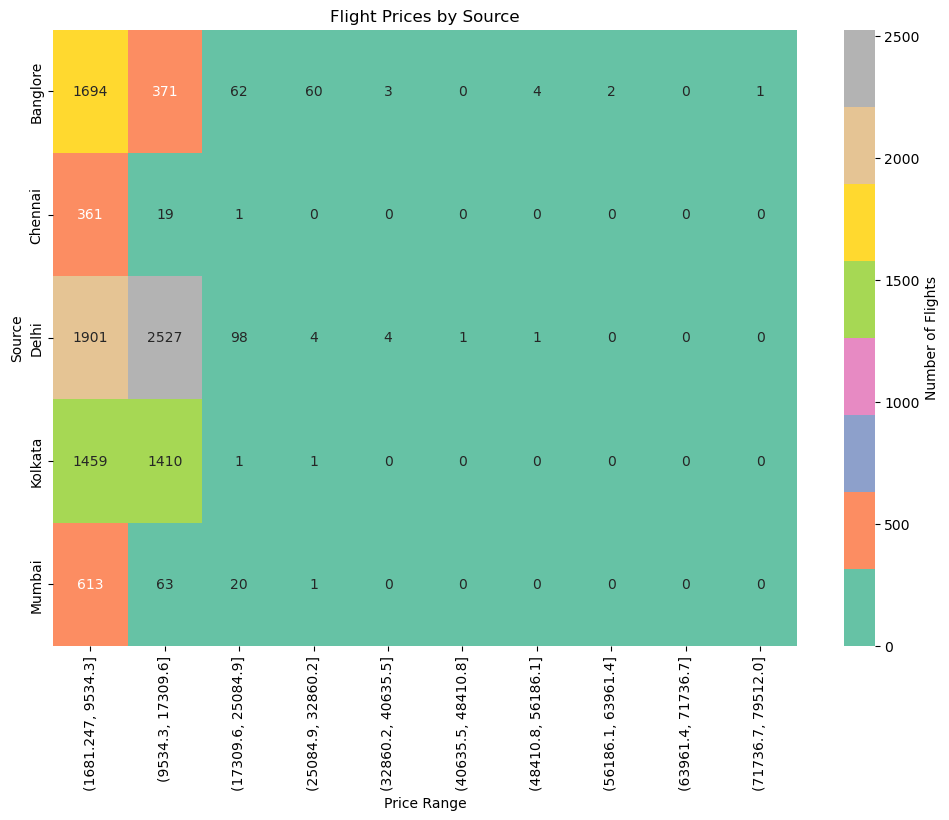

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table to count the number of flights for each airline and price range
heatmap_data = data.pivot_table(index='Source', columns=pd.cut(data['Price'], bins=10), aggfunc='size', fill_value=0)

# Create the heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Set2', annot=True, fmt='g', cbar_kws={'label': 'Number of Flights'})
plt.title('Flight Prices by Source')
plt.xlabel('Price Range')
plt.ylabel('Source')
plt.show()


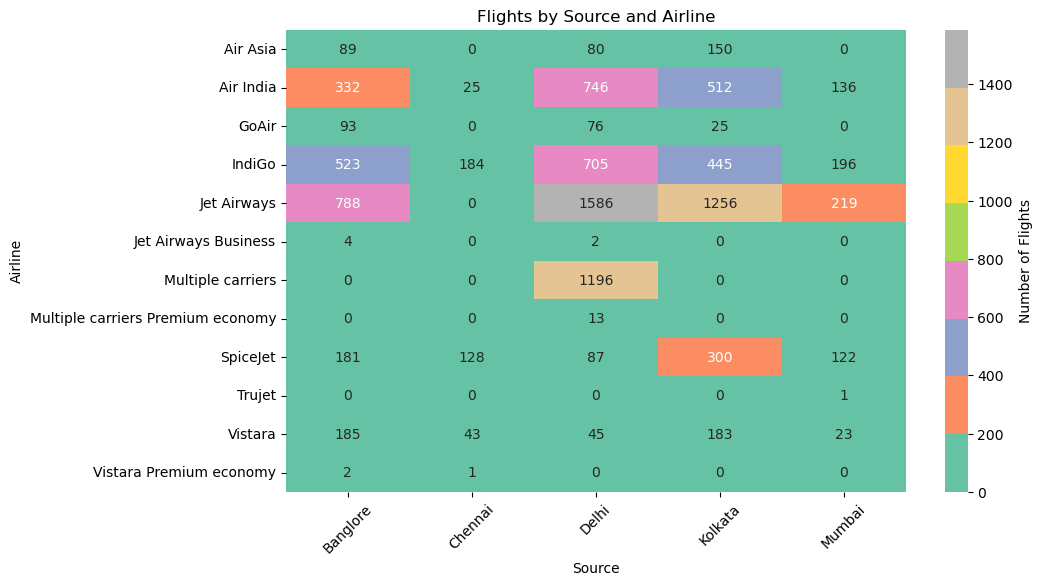

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.DataFrame(data)

# Create a pivot table to count the number of flights for each destination and airline
heatmap_data = data.pivot_table(index='Airline', columns=['Source'], aggfunc='size', fill_value=0)

# Create the heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='Set2', annot=True, fmt='g', cbar_kws={'label': 'Number of Flights'})
plt.title('Flights by Source and Airline')
plt.xlabel('Source')
plt.ylabel('Airline')
plt.xticks(rotation=45)

plt.show()


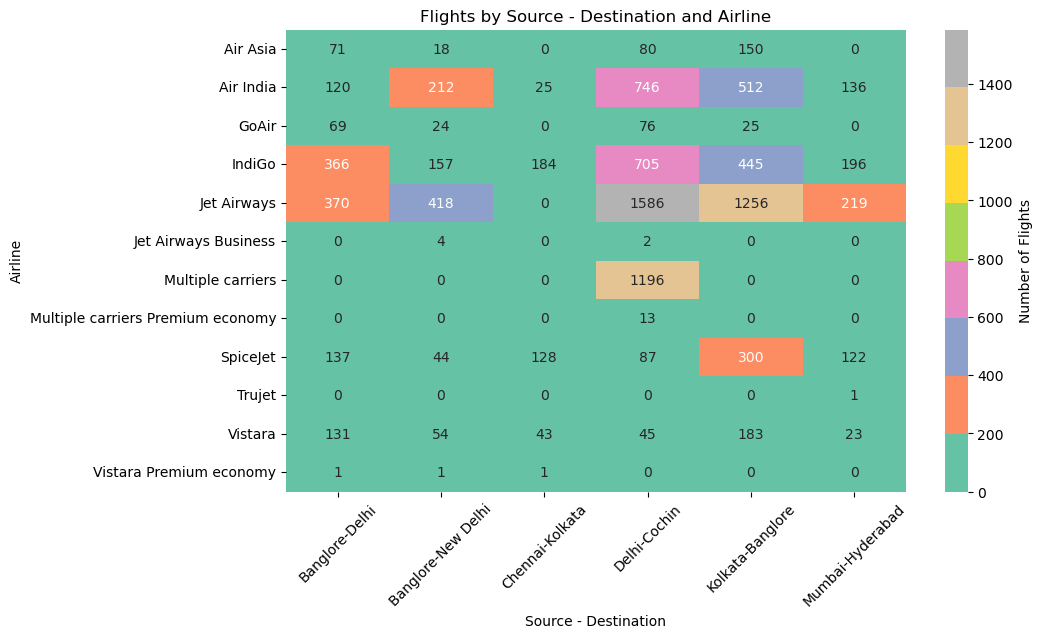

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.DataFrame(data)

# Create a pivot table to count the number of flights for each destination and airline
heatmap_data = data.pivot_table(index='Airline', columns=['Source','Destination'], aggfunc='size', fill_value=0)

# Create the heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='Set2', annot=True, fmt='g', cbar_kws={'label': 'Number of Flights'})
plt.title('Flights by Source - Destination and Airline')
plt.xlabel('Source - Destination')
plt.ylabel('Airline')
plt.xticks(rotation=45)

plt.show()


# Destination

In [40]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

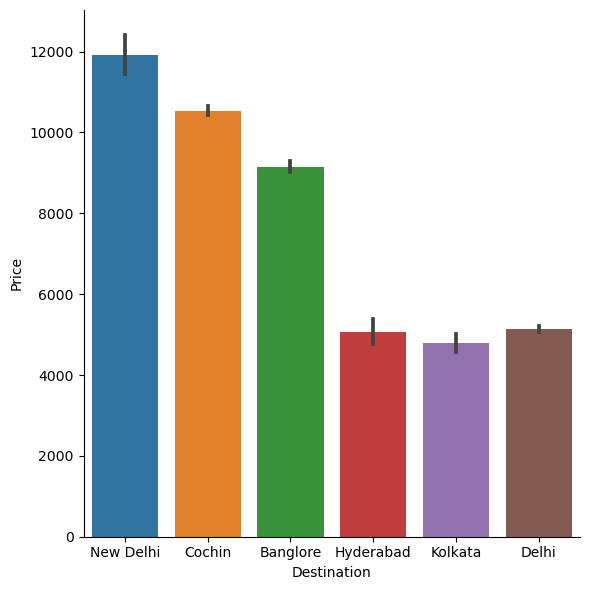

In [41]:
#Destination vs Price
sns.catplot(y='Price',x='Destination',data=data.sort_values('Price',ascending=False),kind='bar',height=6,aspect=1)
plt.show()

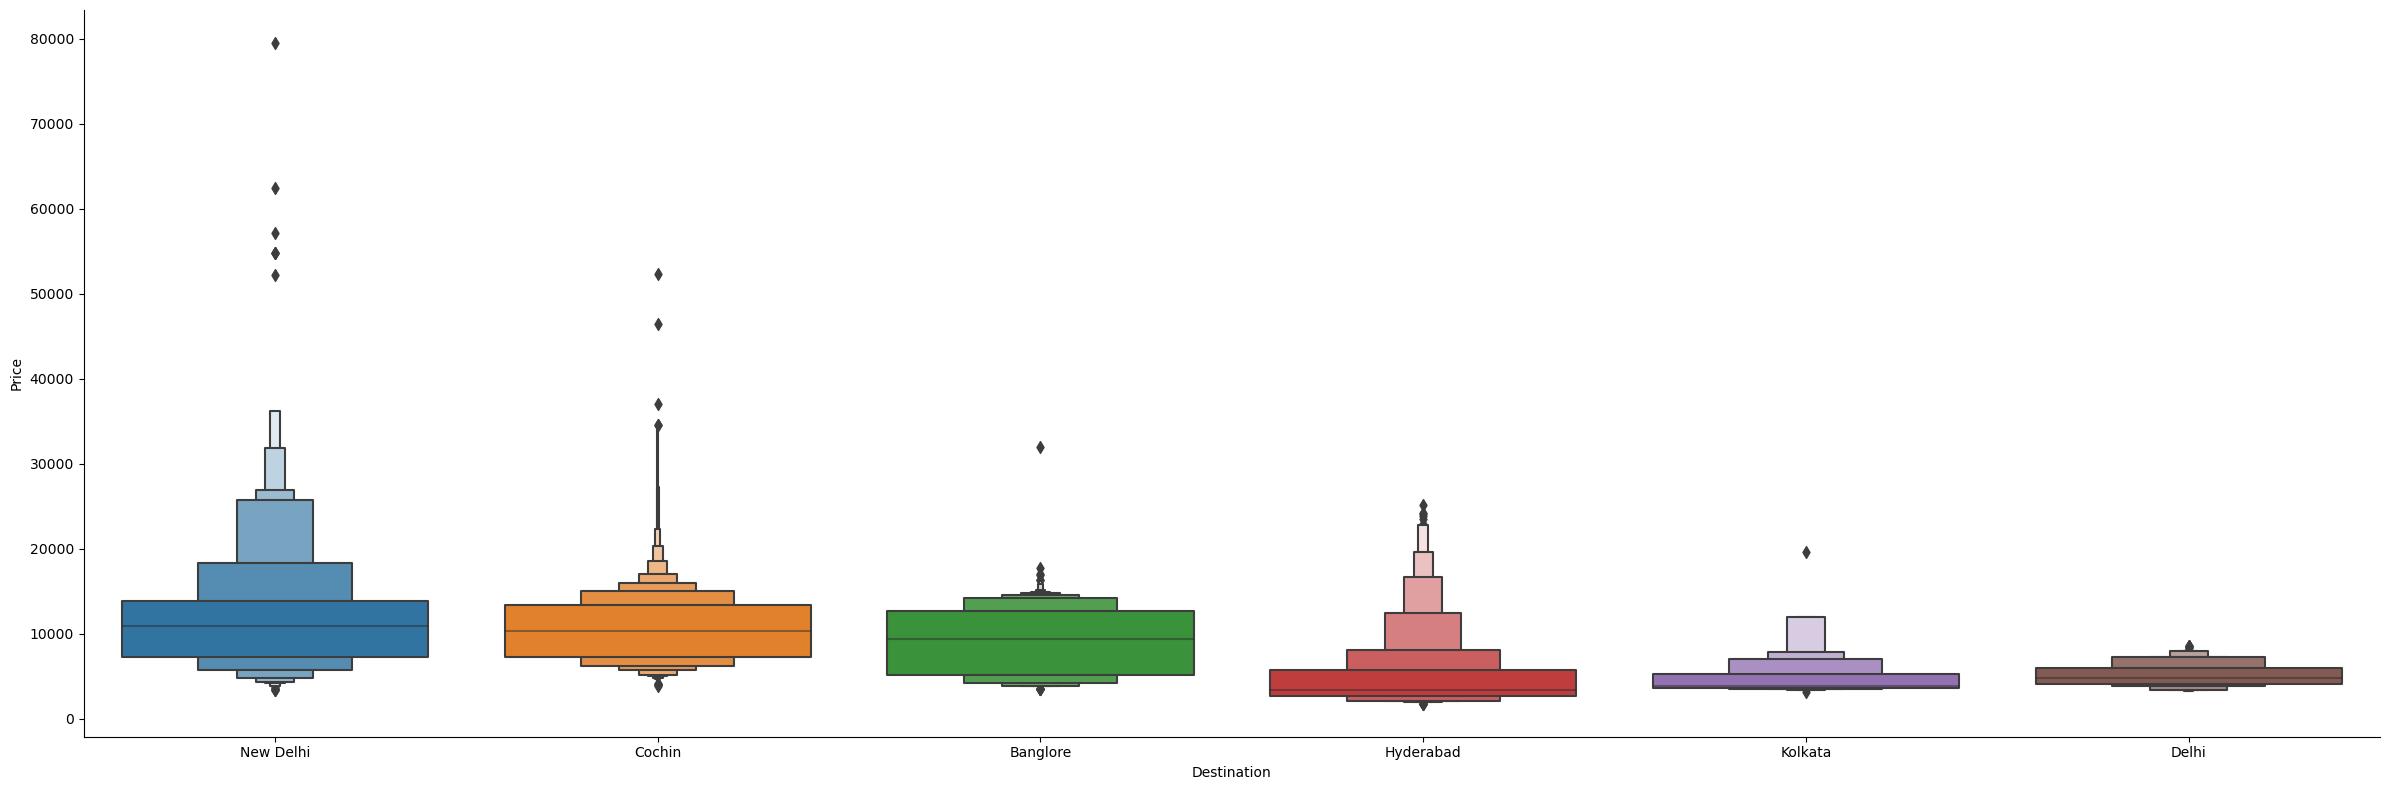

In [42]:
#Destination vs Price
sns.catplot(y='Price',x='Destination',data=data.sort_values('Price',ascending=False),kind='boxen',height=8,aspect=3)
plt.show()

HEATMAP OF FLIGHT PRICE BY DESTINATION

This code will create a heatmap visualization representing the distribution of Flight Prices by Destination. Let's break down how the code works:

1. **Pivot Table Creation**:
   - The `pivot_table()` function is used to create a pivot table from the `data` DataFrame.
   - The index of the pivot table is set to the 'Destination' column, which likely represents the destination airports.
   - The columns of the pivot table are created using `pd.cut()` to bin the 'Price' column into 10 equally spaced intervals. Each interval represents a price range.
   - The `aggfunc='size'` parameter specifies that we want to count the number of flights falling into each price range for each destination.
   - `fill_value=0` ensures that if there are no flights in a particular price range for a destination, it will be filled with 0.

2. **Heatmap Creation**:
   - The `heatmap_data` pivot table created above is used as input for creating the heatmap.
   - Seaborn's `heatmap()` function is used to create the heatmap visualization.
   - The `cmap='YlGnBu'` parameter specifies the color map for the heatmap.
   - `annot=True` displays the numeric values (counts) within each cell of the heatmap.
   - `fmt='g'` specifies the format for the annotations (counts) as standard decimal numbers.
   - `cbar_kws={'label': 'Number of Flights'}` adds a label to the color bar indicating the meaning of the color scale.
   - The title, xlabel, and ylabel are set to provide context to the visualization.

Overall, the heatmap will show the distribution of flight prices for each destination airport, allowing you to visually analyze how prices vary across different destinations and price ranges. Darker cells indicate a higher number of flights within that price range for a particular destination, while lighter cells indicate fewer flights.

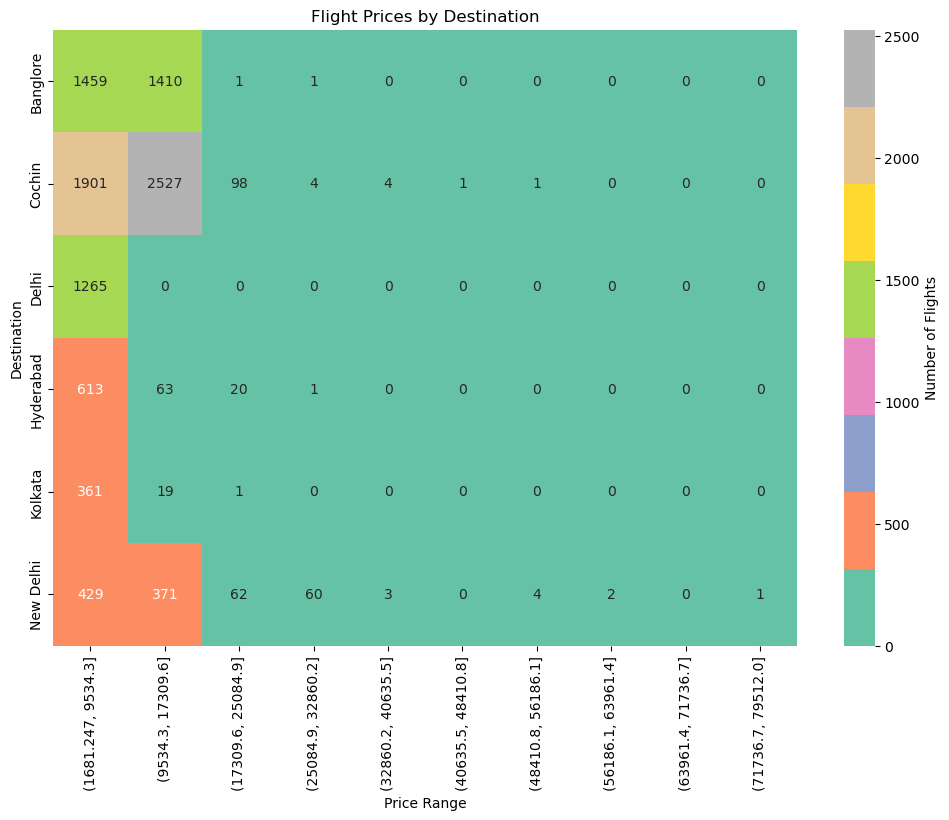

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table to count the number of flights for each airline and price range
heatmap_data = data.pivot_table(index='Destination', columns=pd.cut(data['Price'], bins=10), aggfunc='size', fill_value=0)

# Create the heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Set2', annot=True, fmt='g', cbar_kws={'label': 'Number of Flights'})
plt.title('Flight Prices by Destination')
plt.xlabel('Price Range')
plt.ylabel('Destination')
plt.show()


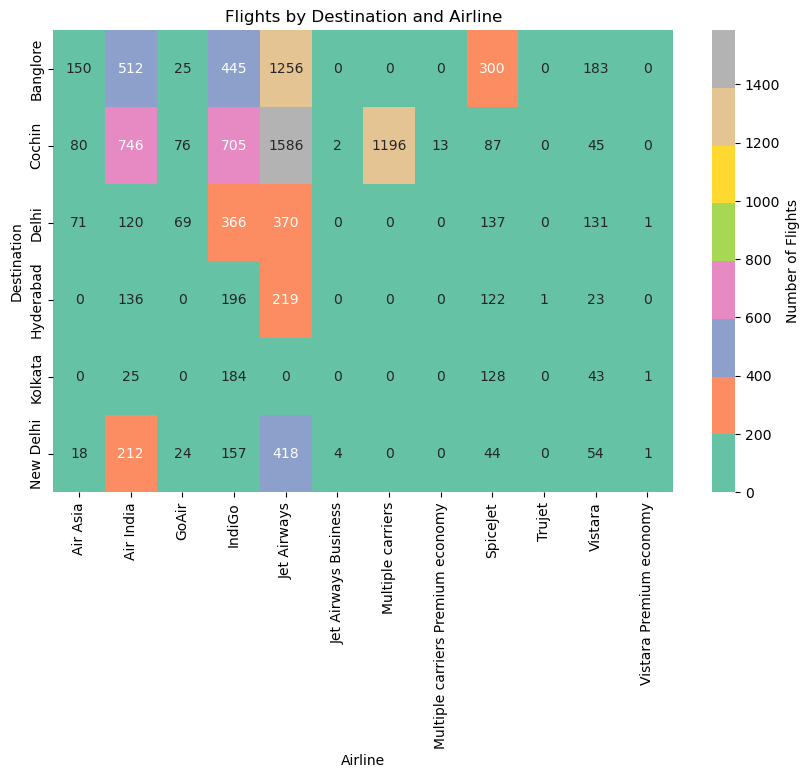

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.DataFrame(data)

# Create a pivot table to count the number of flights for each destination and airline
heatmap_data = data.pivot_table(index='Destination', columns=['Airline'], aggfunc='size', fill_value=0)

# Create the heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='Set2', annot=True, fmt='g', cbar_kws={'label': 'Number of Flights'})
plt.title('Flights by Destination and Airline')
plt.xlabel('Airline')
plt.ylabel('Destination')
plt.show()


Some Observation Based on these Heatmaps

In [45]:
# Group the data by airline, source, and destination, and then count the number of flights
flight_counts = data.groupby(['Airline', 'Source', 'Destination']).size().reset_index(name='Number of Flights')

print("Number of flights with source, destination, and airline:",'\n')
print(flight_counts,'\n')

# Sort the flight counts dataframe by the "Number of Flights" column in descending order
flight_counts_sorted = flight_counts.sort_values(by='Number of Flights', ascending=False)

# Fetch the row with the maximum number of flights
max_flights_row = flight_counts_sorted.iloc[0]

# Extract airline, source, and destination from the row
airline_with_max_flights = max_flights_row['Airline']
source_with_max_flights = max_flights_row['Source']
destination_with_max_flights = max_flights_row['Destination']
num_flights = max_flights_row['Number of Flights']

print("Airline with the maximum number of flights:", airline_with_max_flights,'\n')
print("Source with the maximum number of flights:", source_with_max_flights,'\n')
print("Destination with the maximum number of flights:", destination_with_max_flights,'\n')
print("Number of flights:", num_flights)


Number of flights with source, destination, and airline: 

                              Airline    Source Destination  Number of Flights
0                            Air Asia  Banglore       Delhi                 71
1                            Air Asia  Banglore   New Delhi                 18
2                            Air Asia     Delhi      Cochin                 80
3                            Air Asia   Kolkata    Banglore                150
4                           Air India  Banglore       Delhi                120
5                           Air India  Banglore   New Delhi                212
6                           Air India   Chennai     Kolkata                 25
7                           Air India     Delhi      Cochin                746
8                           Air India   Kolkata    Banglore                512
9                           Air India    Mumbai   Hyderabad                136
10                              GoAir  Banglore       Delhi             

# Now, Applying OneHotEncoding On Airline , Source , Destination

# AIRLINE

In [46]:
#As Destination is Nominal data we can use OneHotEncoding
Airline=data[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  
0               0                0                                0  
1               0                0                                0  
2               0                0                                0  
3               0                0                                0  
4               0                0                                0

In [47]:
data=pd.concat([Airline,data],axis=1)

# DESTINATION

In [48]:
#As Destination is Nominal data we can use OneHotEncoding
# Renaming destination 'New Delhi' to 'Delhi' - to match with Source

Destination = data[["Destination"]]
Current_Destination_List = Destination['Destination']
New_Destination_List = []

for value in Current_Destination_List:
  if value in ['New Delhi']:
    New_Destination_List.append('Delhi')
  else:
    New_Destination_List.append(value)

Destination['Destination'] = pd.DataFrame(New_Destination_List)

Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  1                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  1                      0   

   Destination_Kolkata  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

In [49]:
data=pd.concat([Destination,data],axis=1)

# SOURCE

In [50]:
#As Destination is Nominal data we can use OneHotEncoding
Source=data[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai
0               0             0               0              0
1               0             0               1              0
2               0             1               0              0
3               0             0               1              0
4               0             0               0              0

In [51]:
data=pd.concat([Source,data],axis=1)

In [52]:
data[:].dtypes

Source_Chennai                                 uint8
Source_Delhi                                   uint8
Source_Kolkata                                 uint8
Source_Mumbai                                  uint8
Destination_Cochin                             uint8
Destination_Delhi                              uint8
Destination_Hyderabad                          uint8
Destination_Kolkata                            uint8
Airline_Air India                              uint8
Airline_GoAir                                  uint8
Airline_IndiGo                                 uint8
Airline_Jet Airways                            uint8
Airline_Jet Airways Business                   uint8
Airline_Multiple carriers                      uint8
Airline_Multiple carriers Premium economy      uint8
Airline_SpiceJet                               uint8
Airline_Trujet                                 uint8
Airline_Vistara                                uint8
Airline_Vistara Premium economy               

In [53]:
# Now we can drop Airline, Source, Destination columns as they are not in use
data.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [54]:
data[:].dtypes

Source_Chennai                                 uint8
Source_Delhi                                   uint8
Source_Kolkata                                 uint8
Source_Mumbai                                  uint8
Destination_Cochin                             uint8
Destination_Delhi                              uint8
Destination_Hyderabad                          uint8
Destination_Kolkata                            uint8
Airline_Air India                              uint8
Airline_GoAir                                  uint8
Airline_IndiGo                                 uint8
Airline_Jet Airways                            uint8
Airline_Jet Airways Business                   uint8
Airline_Multiple carriers                      uint8
Airline_Multiple carriers Premium economy      uint8
Airline_SpiceJet                               uint8
Airline_Trujet                                 uint8
Airline_Vistara                                uint8
Airline_Vistara Premium economy               

In [55]:
data.columns.tolist()

['Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Airline_Air India',
 'Airline_GoAir',
 'Airline_IndiGo',
 'Airline_Jet Airways',
 'Airline_Jet Airways Business',
 'Airline_Multiple carriers',
 'Airline_Multiple carriers Premium economy',
 'Airline_SpiceJet',
 'Airline_Trujet',
 'Airline_Vistara',
 'Airline_Vistara Premium economy',
 'Total_Stops',
 'Price',
 'Duration_Hours',
 'Dep_hour',
 'Dep_min',
 'Arrival_hour',
 'Arrival_min',
 'Journey_day',
 'Journey_month']

In [56]:
desired_order=['Airline_Air India',
 'Airline_GoAir',
 'Airline_IndiGo',
 'Airline_Jet Airways',
 'Airline_Jet Airways Business',
 'Airline_Multiple carriers',
 'Airline_Multiple carriers Premium economy',
 'Airline_SpiceJet',
 'Airline_Trujet',
 'Airline_Vistara',
 'Airline_Vistara Premium economy',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai', 
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Journey_day',
 'Journey_month',
 'Dep_hour',
 'Dep_min',
 'Arrival_hour',
 'Arrival_min',
 'Duration_Hours',
 'Total_Stops',
 'Price']

In [57]:
data=data[desired_order]

In [58]:
data

Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                      0              0               1                    0   
1                      1              0               0                    0   
2                      0              0               0                    1   
3                      0              0               1                    0   
4                      0              0               1                    0   
...                  ...            ...             ...                  ...   
10678                  0              0               0                    0   
10679                  1              0               0                    0   
10680                  0              0               0                    1   
10681                  0              0               0                    0   
10682                  1              0               0                    0   

       Airline_Jet Airways Business  Airline_Multiple carriers  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 0                          0   
...                             ...                        ...   
10678                             0                          0   
10679                             0                          0   
10680                             0                          0   
10681                             0                          0   
10682                             0                          0   

       Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                              0                 0   
1                                              0                 0   
2                                              0                 0   
3                                              0                 0   
4                                              0                 0   
...                                          ...               ...   
10678                                          0                 0   
10679                                          0                 0   
10680                                          0                 0   
10681                                          0                 0   
10682                                          0                 0   

       Airline_Trujet  Airline_Vistara  ...  Destination_Kolkata  Journey_day  \
0                   0                0  ...                    0           24   
1                   0                0  ...                    0            5   
2                   0                0  ...                    0            6   
3                   0                0  ...                    0            5   
4                   0                0  ...                    0            3   
...               ...              ...  ...                  ...          ...   
10678               0                0  ...                    0            4   
10679               0                0  ...                    0           27   
10680               0                0  ...                    0           27   
10681               0                1  ...                    0            3   
10682               0                0  ...                    0            5   

       Journey_month  Dep_hour  Dep_min  Arrival_hour  Arrival_min  \
0                  3        22       20             1           10   
1                  1         5       50            13           15   
2                  9         9       25             4           25   
3                 12        18        5            23           30   
4                  1        16       50            21           35   
...              ..

In [59]:
data.shape

(10682, 28)

In [60]:
pd.set_option('display.max_columns', None)

data.corr()

Airline_Air India  Airline_GoAir  \
Airline_Air India                                   1.000000      -0.060221   
Airline_GoAir                                      -0.060221       1.000000   
Airline_IndiGo                                     -0.215977      -0.066339   
Airline_Jet Airways                                -0.332324      -0.102076   
Airline_Jet Airways Business                       -0.010497      -0.003224   
Airline_Multiple carriers                          -0.157223      -0.048292   
Airline_Multiple carriers Premium economy          -0.015456      -0.004747   
Airline_SpiceJet                                   -0.127510      -0.039166   
Airline_Trujet                                     -0.004284      -0.001316   
Airline_Vistara                                    -0.095939      -0.029469   
Airline_Vistara Premium economy                    -0.007421      -0.002280   
Source_Chennai                                     -0.051068      -0.026156   
Source_Delhi                                        0.001257      -0.009049   
Source_Kolkata                                      0.023606      -0.042921   
Source_Mumbai                                       0.022268      -0.035933   
Destination_Cochin                                  0.006968      -0.007605   
Destination_Delhi                                  -0.018227       0.076489   
Destination_Hyderabad                               0.021244      -0.033095   
Destination_Kolkata                                -0.044251      -0.026156   
Journey_day                                        -0.037279       0.002350   
Journey_month                                      -0.000281      -0.017538   
Dep_hour                                           -0.012879      -0.016373   
Dep_min                                            -0.045688       0.076751   
Arrival_hour                                        0.088872       0.018526   
Arrival_min                                         0.061231       0.096839   
Duration_Hours                                      0.261553      -0.092147   
Total_Stops                                         0.271094      -0.060110   
Price                                               0.050432      -0.095151   

                                           Airline_IndiGo  \
Airline_Air India                               -0.215977   
Airline_GoAir                                   -0.066339   
Airline_IndiGo                                   1.000000   
Airline_Jet Airways                             -0.366085   
Airline_Jet Airways Business                    -0.011563   
Airline_Multiple carriers                       -0.173196   
Airline_Multiple carriers Premium economy       -0.017026   
Airline_SpiceJet                                -0.140464   
Airline_Trujet                                  -0.004720   
Airline_Vistara                                 -0.105686   
Airline_Vistara Premium economy                 -0.008175   
Source_Chennai                                   0.141911   
Source_Delhi                                    -0.080168   
Source_Kolkata                                  -0.057229   
Source_Mumbai                                    0.059686   
Destination_Cochin                              -0.070945   
Destination_Delhi                                0.062163   
Destination_Hyderabad                            0.042369   
Destination_Kolkata                              0.117571   
Journey_day                                      0.013223   
Journey_month                                   -0.037203   
Dep_hour                                        -0.023395   
Dep_min                                         -0.014714   
Arrival_hour                                    -0.071491   
Arrival_min                                      0.035124   
Duration_Hours                                  -0.343503   
Total_Stops                                     -0.302991   
Price                                      

In [64]:
data.columns.to_list()

['Airline_Air India',
 'Airline_GoAir',
 'Airline_IndiGo',
 'Airline_Jet Airways',
 'Airline_Jet Airways Business',
 'Airline_Multiple carriers',
 'Airline_Multiple carriers Premium economy',
 'Airline_SpiceJet',
 'Airline_Trujet',
 'Airline_Vistara',
 'Airline_Vistara Premium economy',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Journey_day',
 'Journey_month',
 'Dep_hour',
 'Dep_min',
 'Arrival_hour',
 'Arrival_min',
 'Duration_Hours',
 'Total_Stops',
 'Price']

In [65]:
data.isna().sum()

Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai                                0
Destination_Cochin                           0
Destination_Delhi                            0
Destination_Hyderabad                        0
Destination_Kolkata                          0
Journey_day                                  0
Journey_month                                0
Dep_hour     

In [66]:
x=data.loc[:, ['Airline_Air India',
 'Airline_GoAir',
 'Airline_IndiGo',
 'Airline_Jet Airways',
 'Airline_Jet Airways Business',
 'Airline_Multiple carriers',
 'Airline_Multiple carriers Premium economy',
 'Airline_SpiceJet',
 'Airline_Trujet',
 'Airline_Vistara',
 'Airline_Vistara Premium economy',
 'Source_Chennai',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Journey_day',
 'Journey_month',
 'Dep_hour',
 'Dep_min',           
 'Arrival_hour',
 'Arrival_min',
 'Duration_Hours',
 'Total_Stops']]

y=data.iloc[:,-1]
print(x.shape , y.shape)

(10682, 26) (10682,)


# Feature Selection

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

heatmap

feature_importance_


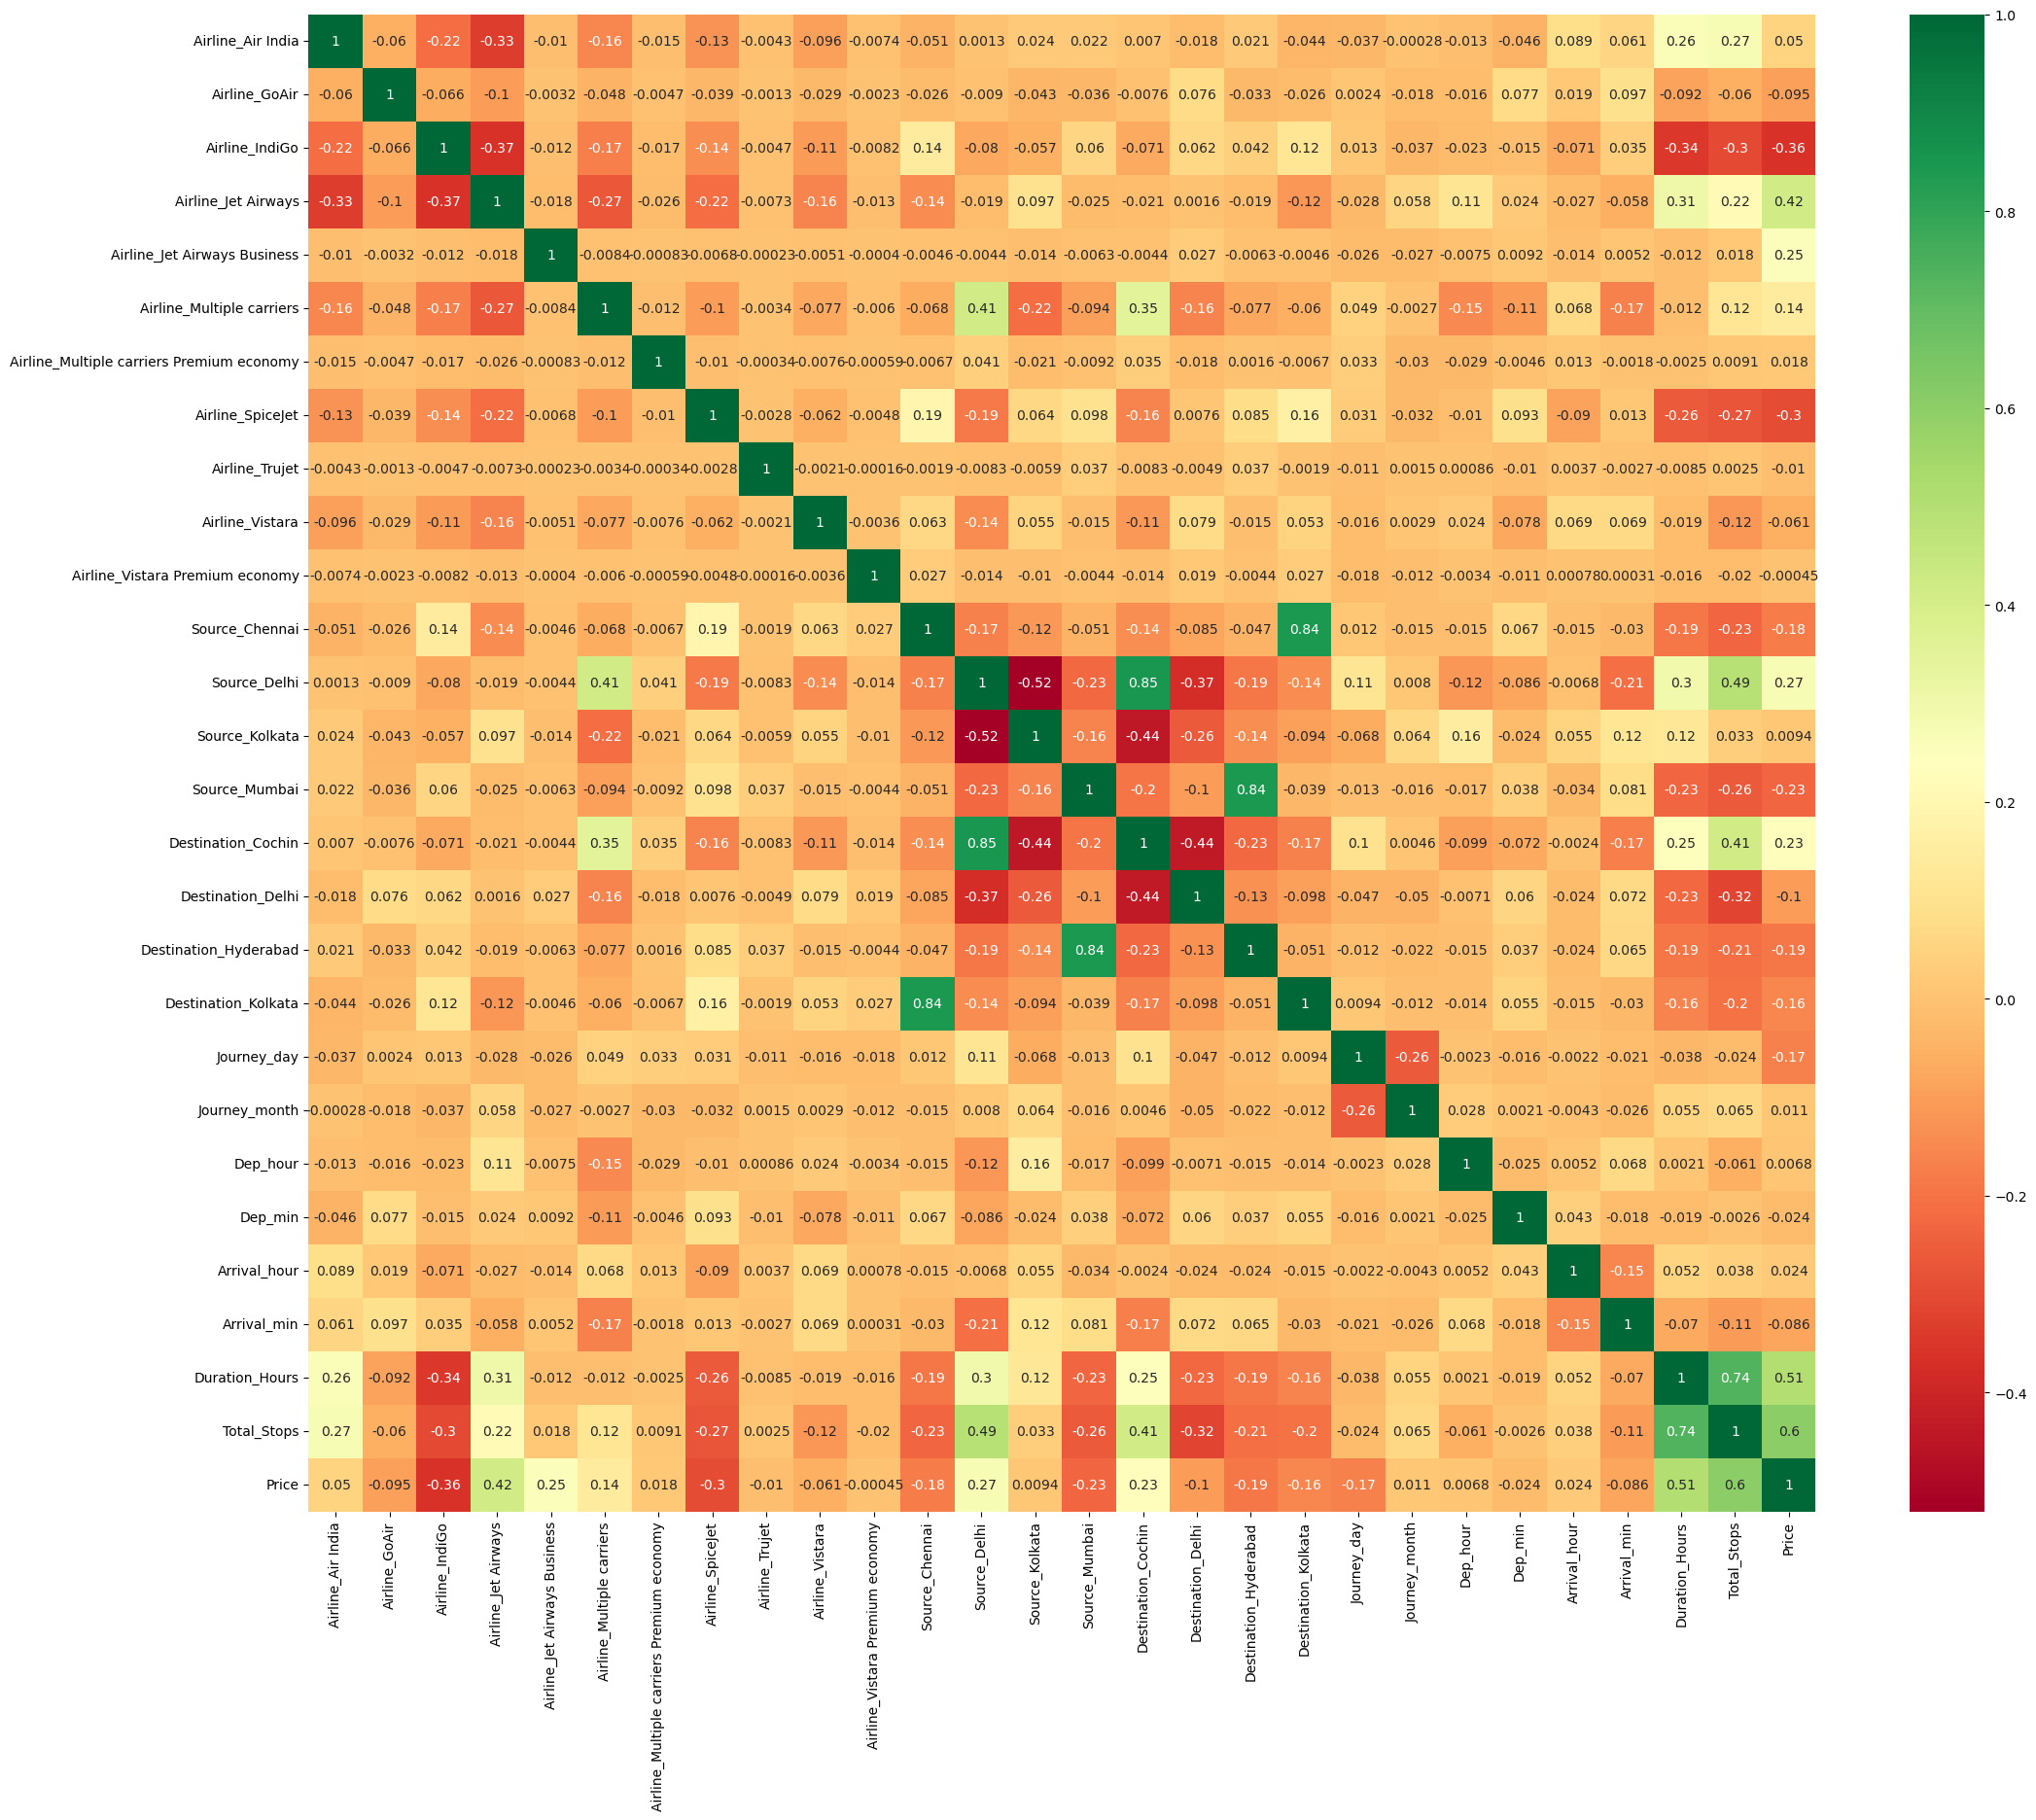

In [67]:
# Finds correlation between Independent and Dependent attributes

plt.figure(figsize = (25,20))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [69]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x,y)
print(etr.feature_importances_)

[7.98056568e-03 2.24464350e-03 1.54683105e-02 1.32160166e-01
 6.60669850e-02 2.19944557e-02 9.78818943e-04 6.54961363e-03
 9.52276140e-05 4.54988448e-03 1.27585177e-04 1.75375067e-03
 1.20689890e-02 1.62058383e-02 6.19180295e-03 1.20441421e-02
 1.70005630e-03 6.46232963e-04 1.16445881e-01 7.97373102e-02
 2.69842324e-02 2.60327342e-02 3.10739135e-02 2.51186787e-02
 1.32160544e-01 2.53619637e-01]


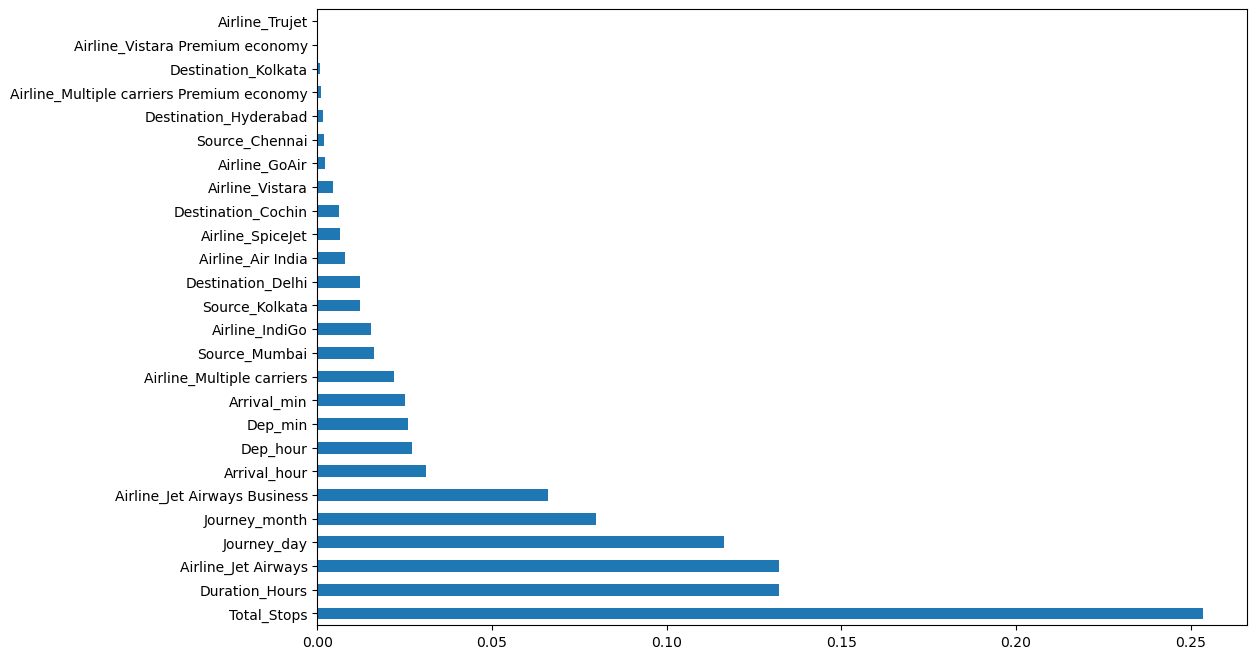

In [70]:
# PLot graph of feature importances for better visualization 

plt.figure(figsize = (12,8))
feature_importances = pd.Series(etr.feature_importances_, index=x.columns)
feature_importances.nlargest(29).plot(kind='barh')
plt.show()

In [71]:
# Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    # Calculating Variable Inflation Factor (VIF)
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)


# Compute VIF on x

calc_vif(x)

variables       VIF
0                           Airline_Air India  4.855807
1                               Airline_GoAir  1.358024
2                              Airline_IndiGo  4.376969
3                         Airline_Jet Airways  8.627822
4                Airline_Jet Airways Business  1.013736
5                   Airline_Multiple carriers  3.202153
6   Airline_Multiple carriers Premium economy  1.026612
7                            Airline_SpiceJet  2.374390
8                              Airline_Trujet  1.004440
9                             Airline_Vistara  1.957199
10            Airline_Vistara Premium economy  1.006192
11                             Source_Chennai  3.866175
12                             Source_Kolkata  4.223848
13                              Source_Mumbai  3.927183
14                         Destination_Cochin  6.696017
15                          Destination_Delhi  3.770867
16                      Destination_Hyderabad  4.147155
17                        Destination_Kolkata  3.840389
18                                Journey_day  3.181863
19                              Journey_month  4.504458
20                                   Dep_hour  5.636909
21                                    Dep_min  2.752323
22                               Arrival_hour  4.904275
23                                Arrival_min  3.369551
24                             Duration_Hours  6.644896
25                                Total_Stops  7.114132

In [72]:
x=data.loc[:, [ 'Airline_Air India',
 'Airline_GoAir',
 'Airline_IndiGo',
 'Airline_Jet Airways',
 'Airline_Jet Airways Business',
 'Airline_Multiple carriers',
 'Airline_Multiple carriers Premium economy',
 'Airline_SpiceJet',
 'Airline_Trujet',
 'Airline_Vistara',
 'Airline_Vistara Premium economy',
 'Source_Chennai',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Cochin',    
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Journey_day',
 'Journey_month',
 'Dep_hour',
 'Dep_min',           
 'Arrival_hour',
 'Arrival_min',
 'Duration_Hours',
 'Total_Stops']]
x.head()

Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  \
0               0                0                                0   
1               0                0                                0   
2               0                0                                0   
3               0                0                                0   
4               0                0                                0   

   Source_Chennai  Source_Kolkata  Source_Mumbai  Destination_Cochin  \
0               0               0              0                   0   
1               0               1              0                   0   
2               0               0              0                   1   
3               0               1              0                   0   
4               0               0              0                   0   

   Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  Journey_day  \
0                  1                      0                    0           24   
1                  0                      0                    0            5   
2                  0                      0                    0            6   
3                  0                      0                    0            5   
4                  1                      0                    0            3   

   Journey_month  Dep_hour  Dep_min  Arrival_hour  Arrival_min  \
0              3        22       20             1           10   
1              1         5       50            13           15   
2              9         9       25             4           25   
3             12        18        5            23           30   
4              1        16       50            21           35   

   Duration_Hours  Total_Stops  
0        2.833333            0  
1        7.416667            2  
2       19.000000            2  
3        5.416667            1  
4        4.750000            1

# Fitting Models

In [73]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

LR = LinearRegression()
LR.fit(x_train, y_train)


from sklearn import metrics
LinearRegression_R2_score_training= round(LR.score(x_train, y_train)*100,2)
LinearRegression_R2_score_test= round(LR.score(x_test, y_test)*100,2)

print('Model Performance on Training Set:',LinearRegression_R2_score_training)
print('Model Performance on Test Set:', LinearRegression_R2_score_test)

Model Performance on Training Set: 59.69
Model Performance on Test Set: 58.25


In [76]:
y_pred = LR.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Linear Regression R2 Score:", r2)

Linear Regression R2 Score: 0.5825370854268196


Evaluation Metrics and Graphical representation for Linear Regression  

Mean Absolute Error (MAE): 2057.2121066984605 

Mean Squared Error (MSE): 9001358.877275655 

Root Mean Squared Error (RMSE): 3000.226470997757 

Normalised Root Mean Squared Error (RMSE): 0.05 

Max Value:  79512 

Min Value:  1759


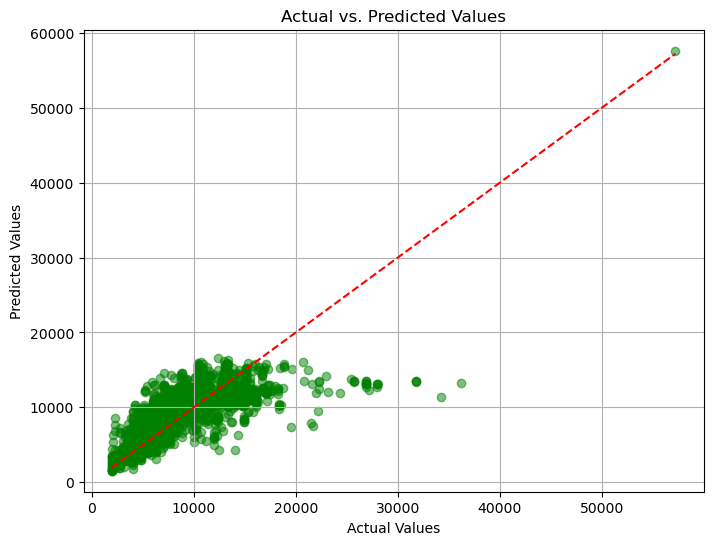

In [77]:
print("Evaluation Metrics and Graphical representation for Linear Regression ",'\n')

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

y_pred = LR.predict(x_test)


# Calculate additional evaluation metrics
# Model Error Values
LR_MAE = mean_absolute_error(y_test, y_pred)
LR_MSE = mean_squared_error(y_test, y_pred)
LR_RMSE = np.sqrt(LR_MSE)
LR_N_RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)),2)
                                                              
print("Mean Absolute Error (MAE):", LR_MAE,'\n')
print("Mean Squared Error (MSE):", LR_MSE,'\n')
print("Root Mean Squared Error (RMSE):", LR_RMSE,'\n') # RMSE = sqrt((PV-OV)^2/n)
print("Normalised Root Mean Squared Error (RMSE):", LR_N_RMSE,'\n')                                                              
print('Max Value: ', max(y),'\n')
print('Min Value: ',min(y))


# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Ridge Regression

In [78]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

RIDGE = Ridge()
RIDGE.fit(x_train,y_train)

Ridge_R2_score_training= round(RIDGE.score(x_train, y_train)*100,2)
Ridge_R2_score_test= round(RIDGE.score(x_test, y_test)*100,2)

print('Model Performance on Training Set:',Ridge_R2_score_training)
print('Model Performance on Test Set:', Ridge_R2_score_test)

Model Performance on Training Set: 59.69
Model Performance on Test Set: 58.25


In [79]:
y_pred = RIDGE.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Ridge Regression R2 Score:", r2)

Ridge Regression R2 Score: 0.5825342717975843


Mean Absolute Error (MAE): 2057.1880360360688 

Mean Squared Error (MSE): 9001419.544907702 

Root Mean Squared Error (RMSE): 3000.2365814894833 

Normalised Root Mean Squared Error (RMSE): 0.05 

Max Value:  79512 

Min Value:  1759


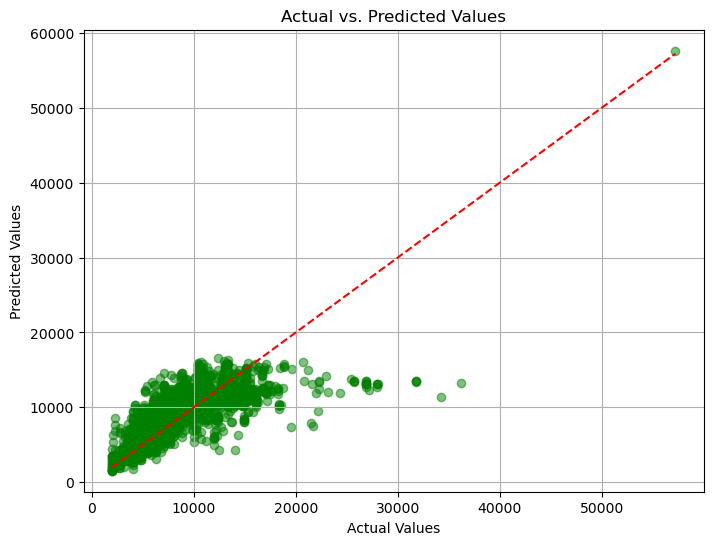

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


y_pred = RIDGE.predict(x_test)

# Calculate additional evaluation metrics
# Model Error Values
Ridge_MAE = mean_absolute_error(y_test, y_pred)
Ridge_MSE = mean_squared_error(y_test, y_pred)
Ridge_RMSE = np.sqrt(Ridge_MSE)
Ridge_N_RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)),2)
                                                              
print("Mean Absolute Error (MAE):", Ridge_MAE,'\n')
print("Mean Squared Error (MSE):", Ridge_MSE,'\n')
print("Root Mean Squared Error (RMSE):", Ridge_RMSE,'\n') # RMSE = sqrt((PV-OV)^2/n)
print("Normalised Root Mean Squared Error (RMSE):", Ridge_N_RMSE,'\n')                                                              
print('Max Value: ', max(y),'\n')
print('Min Value: ',min(y))


# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Lasso Regression

In [81]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

Lasso = Lasso()
Lasso.fit(x_train,y_train)

Lasso_R2_score_training= round(Lasso.score(x_train, y_train)*100,2)
Lasso_R2_score_test= round(Lasso.score(x_test, y_test)*100,2)

print('Model Performance on Training Set:',Lasso_R2_score_training)
print('Model Performance on Test Set:', Lasso_R2_score_test)

Model Performance on Training Set: 59.69
Model Performance on Test Set: 58.25


In [82]:
y_pred = Lasso.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Lasso Regression R2 Score:", r2)

Lasso Regression R2 Score: 0.5825060259148036


Mean Absolute Error (MAE): 2056.9006134483784 

Mean Squared Error (MSE): 9002028.584223146 

Root Mean Squared Error (RMSE): 3000.3380783210323 

Normalised Root Mean Squared Error (RMSE): 0.05 

Max Value:  79512 

Min Value:  1759


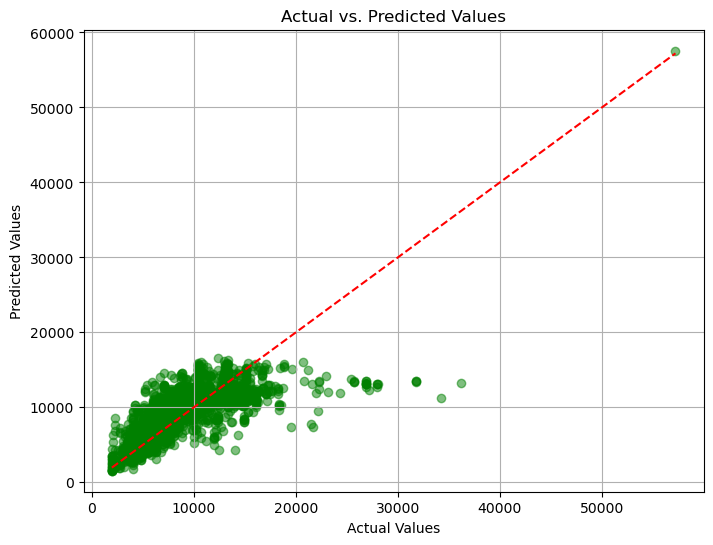

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


y_pred = Lasso.predict(x_test)

# Calculate additional evaluation metrics
# Model Error Values
Lasso_MAE = mean_absolute_error(y_test, y_pred)
Lasso_MSE = mean_squared_error(y_test, y_pred)
Lasso_RMSE = np.sqrt(Lasso_MSE)
Lasso_N_RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)),2)
                                                              
print("Mean Absolute Error (MAE):", Lasso_MAE,'\n')
print("Mean Squared Error (MSE):", Lasso_MSE,'\n')
print("Root Mean Squared Error (RMSE):", Lasso_RMSE,'\n') # RMSE = sqrt((PV-OV)^2/n)
print("Normalised Root Mean Squared Error (RMSE):", Lasso_N_RMSE,'\n')                                                              
print('Max Value: ', max(y),'\n')
print('Min Value: ',min(y))


# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Random Forest Regressor

In [84]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)

from sklearn import metrics
RandomForest_R2_score_training= round(RFR.score(x_train, y_train)*100,2)
RandomForest_R2_score_test= round(RFR.score(x_test, y_test)*100,2)

print('Model Performance on Training Set:',RandomForest_R2_score_training)
print('Model Performance on Test Set:', RandomForest_R2_score_test)

Model Performance on Training Set: 95.72
Model Performance on Test Set: 81.71


In [85]:
y_pred = RFR.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Random Forest Regression R2 Score:", r2)

Random Forest Regression R2 Score: 0.8171374317761524


Evaluation Metrics and Graphical representation for Random Forest Regression  

Mean Absolute Error (MAE): 1187.093469141917 

Mean Squared Error (MSE): 3942892.99562348 

Root Mean Squared Error (RMSE): 1985.6719254759785 

Normalised Root Mean Squared Error (RMSE): 0.04 

Max Value:  79512 

Min Value:  1759


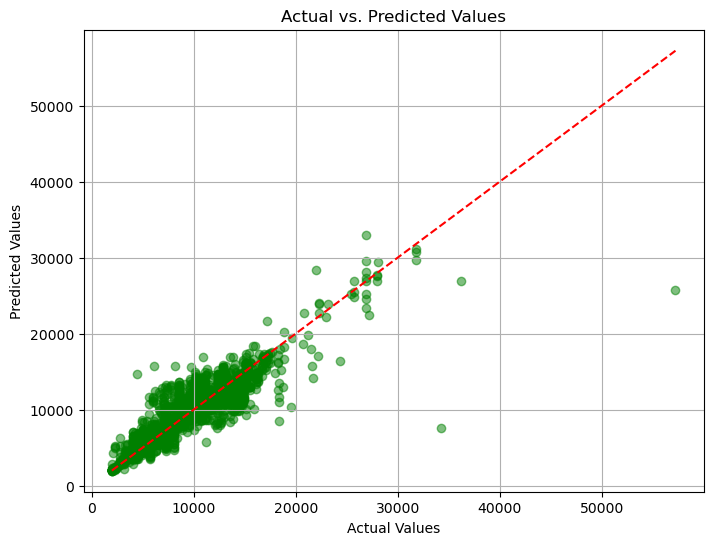

In [86]:
print("Evaluation Metrics and Graphical representation for Random Forest Regression ",'\n')

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

y_pred = RFR.predict(x_test)

# Calculate additional evaluation metrics
# Model Error Values
RFR_MAE = mean_absolute_error(y_test, y_pred)
RFR_MSE = mean_squared_error(y_test, y_pred)
RFR_RMSE = np.sqrt(RFR_MSE)
RFR_N_RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)),2)
                                                              
print("Mean Absolute Error (MAE):", RFR_MAE,'\n')
print("Mean Squared Error (MSE):", RFR_MSE,'\n')
print("Root Mean Squared Error (RMSE):", RFR_RMSE,'\n') # RMSE = sqrt((PV-OV)^2/n)
print("Normalised Root Mean Squared Error (RMSE):", RFR_N_RMSE,'\n')                                                              
print('Max Value: ', max(y),'\n')
print('Min Value: ',min(y))


# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# XGBoost Regressor

In [87]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

XGBR = XGBRegressor()
XGBR.fit(x_train, y_train)

from sklearn import metrics
XGBR_R2_score_training= round(XGBR.score(x_train, y_train)*100,2)
XGBR_R2_score_test= round(XGBR.score(x_test, y_test)*100,2)

print('Model Performance on Training Set:',XGBR_R2_score_training)
print('Model Performance on Test Set:', XGBR_R2_score_test)

Model Performance on Training Set: 93.25
Model Performance on Test Set: 84.35


In [88]:
y_pred = XGBR.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("XGBoost Regression R2 Score:", r2)

XGBoost Regression R2 Score: 0.843540239156505


Evaluation Metrics and Graphical representation for XGBoost Regression  

Mean Absolute Error (MAE): 1196.332478346086 

Mean Squared Error (MSE): 3373594.1757723223 

Root Mean Squared Error (RMSE): 1836.7346503434628 

Normalised Root Mean Squared Error (RMSE): 0.03 

Max Value:  79512 

Min Value:  1759


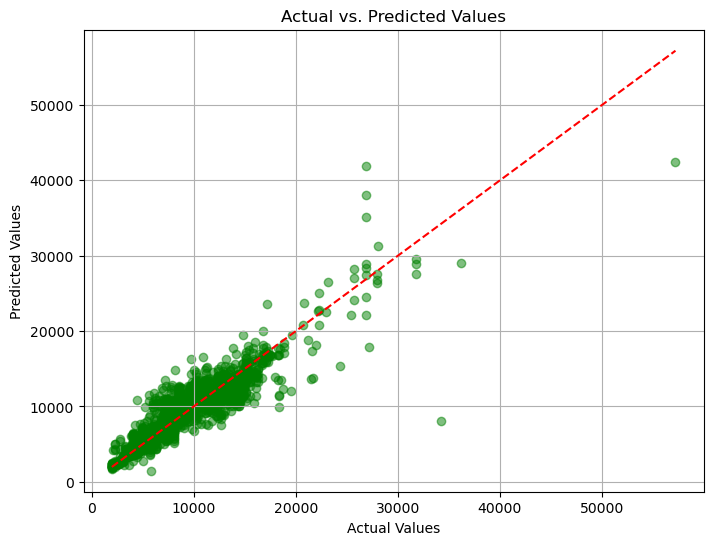

In [89]:
print("Evaluation Metrics and Graphical representation for XGBoost Regression ",'\n')

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


y_pred = XGBR.predict(x_test)


# Calculate additional evaluation metrics
# Model Error Values
XGBR_MAE = mean_absolute_error(y_test, y_pred)
XGBR_MSE = mean_squared_error(y_test, y_pred)
XGBR_RMSE = np.sqrt(XGBR_MSE)
XGBR_N_RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)),2)
                                                              
print("Mean Absolute Error (MAE):", XGBR_MAE,'\n')
print("Mean Squared Error (MSE):", XGBR_MSE,'\n')
print("Root Mean Squared Error (RMSE):", XGBR_RMSE,'\n') # RMSE = sqrt((PV-OV)^2/n)
print("Normalised Root Mean Squared Error (RMSE):", XGBR_N_RMSE,'\n')                                                              
print('Max Value: ', max(y),'\n')
print('Min Value: ',min(y))


# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [90]:
Models = [('Linear Regression', LR_MAE, LR_MSE, LR_RMSE, LR_N_RMSE, LinearRegression_R2_score_training,LinearRegression_R2_score_test), 
          ('Ridge Regression', Ridge_MAE, Ridge_MSE, Ridge_RMSE, Ridge_N_RMSE, Ridge_R2_score_training,Ridge_R2_score_test), 
          ('Lasso Regression', Lasso_MAE, Lasso_MSE, Lasso_RMSE, Lasso_N_RMSE, Lasso_R2_score_training, Lasso_R2_score_test), 
          ('Random Forest Regression', RFR_MAE, RFR_MSE, RFR_RMSE, RFR_N_RMSE, RandomForest_R2_score_training, RandomForest_R2_score_test),
          ('XGBoost Regression', XGBR_MAE, XGBR_MSE, XGBR_RMSE, XGBR_N_RMSE, XGBR_R2_score_training, XGBR_R2_score_test)
         ]

In [91]:
predict = pd.DataFrame(data = Models, columns=['Model', 'MAE', 'MSE', 'RMSE', 'Normalised_RMSE', 'R2_Score_training', 'R2_Score_test']) 
predict

Model          MAE           MSE         RMSE  \
0         Linear Regression  2057.212107  9.001359e+06  3000.226471   
1          Ridge Regression  2057.188036  9.001420e+06  3000.236581   
2          Lasso Regression  2056.900613  9.002029e+06  3000.338078   
3  Random Forest Regression  1187.093469  3.942893e+06  1985.671925   
4        XGBoost Regression  1196.332478  3.373594e+06  1836.734650   

   Normalised_RMSE  R2_Score_training  R2_Score_test  
0             0.05              59.69          58.25  
1             0.05              59.69          58.25  
2             0.05              59.69          58.25  
3             0.04              95.72          81.71  
4             0.03              93.25          84.35

In [92]:
import pandas as pd
import plotly.express as px

# Sort the DataFrame by R2_Score_test in descending order
predict.sort_values(by='R2_Score_test', ascending=False, inplace=True)

# Create the Plotly bar plot
fig = px.bar(predict, 
             x='R2_Score_test', 
             y='Model', 
             orientation='h',  # Horizontal bar plot
             title='Model Performance Based on R2 Score',
             labels={'R2_Score_test': 'R2 Score', 'Model': 'Model'},
             color='R2_Score_test',  # Color by R2 score
             color_continuous_scale='Reds')

# Update the layout for better readability
fig.update_layout(
    xaxis_title='R2 Score',
    yaxis_title='Model',
    xaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
    yaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
    title_font=dict(size=16)
)

# Show the plot
fig.show()


# Hyperparameter Tunning for XGBoost

In [96]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [97]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization
    'reg_lambda': [1, 1.5, 2],   # L2 regularization
}

# Initialize the XGBoost regressor
XGBR = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=XGBR, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best parameters found: {grid_search.best_params_}",'\n')
print(f"Best negative mean squared error: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)


Fitting 5 folds for each of 1458 candidates, totalling 7290 fits
Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 2, 'subsample': 1.0} 

Best negative mean squared error: -3754502.083332835


In [98]:
# Calculate additional evaluation metrics
# Model Error Values

XGBR_MAE = mean_absolute_error(y_test, y_pred)
XGBR_MSE = mean_squared_error(y_test, y_pred)
XGBR_RMSE = np.sqrt(XGBR_MSE)
XGBR_N_RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)),2)
XGBR_R2_Score = round(r2_score(y_test, y_pred)*100,2)

print("Mean Absolute Error (MAE):", XGBR_MAE,'\n')
print("Mean Squared Error (MSE):", XGBR_MSE,'\n')
print("Root Mean Squared Error (RMSE):", XGBR_RMSE,'\n') # RMSE = sqrt((PV-OV)^2/n)
print("Normalised Root Mean Squared Error (RMSE):", XGBR_N_RMSE,'\n')  
print(f"XGBR R2 Score: {XGBR_R2_Score}",'\n')
print('Max Value: ', max(y),'\n')
print('Min Value: ',min(y))

Mean Absolute Error (MAE): 1163.841570099548 

Mean Squared Error (MSE): 3099177.8355626026 

Root Mean Squared Error (RMSE): 1760.4481916723942 

Normalised Root Mean Squared Error (RMSE): 0.03 

XGBR R2 Score: 85.63 

Max Value:  79512 

Min Value:  1759


# Hyperparameter Tunning for Random Forest 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=  27.6s
[CV] END bootstrap=False, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=90

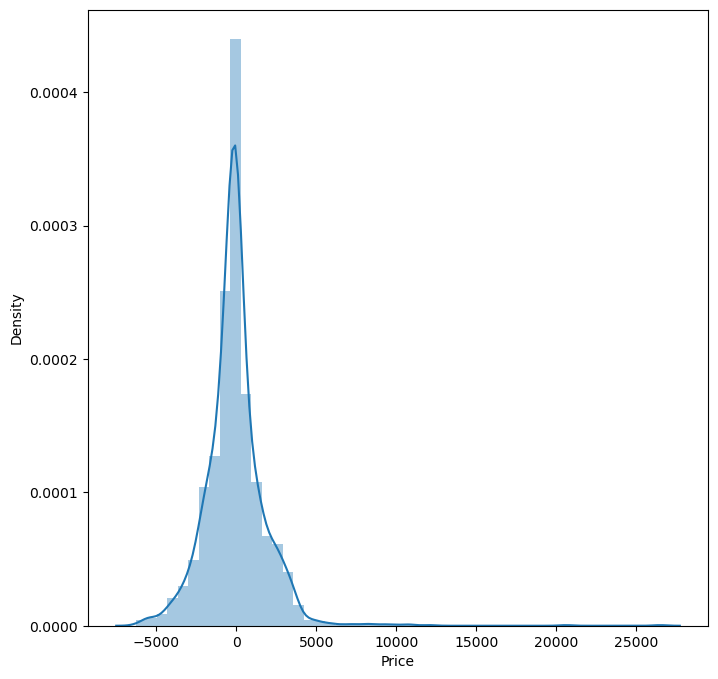

In [104]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
#Bootstrap
bootstrap= [True, False]


# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(x_train, y_train)


rf_random.best_params_

prediction = rf_random.predict(x_test)

plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [105]:
# Calculate additional evaluation metrics
# Model Error Values
RFR_MAE = mean_absolute_error(y_test, prediction)
RFR_MSE = mean_squared_error(y_test, prediction)
RFR_RMSE = np.sqrt(RFR_MSE)
RFR_N_RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, prediction))/(max(y_test)-min(y_test)),2)
RFR_R2_Score = round(r2_score(y_test, prediction)*100,2)
                                                              
print("Mean Absolute Error (MAE):", RFR_MAE,'\n')
print("Mean Squared Error (MSE):", RFR_MSE,'\n')
print("Root Mean Squared Error (RMSE):", RFR_RMSE,'\n') # RMSE = sqrt((PV-OV)^2/n)
print("Normalised Root Mean Squared Error (RMSE):", RFR_N_RMSE,'\n')  
print(f"Test R2 Score: {RFR_R2_Score}",'\n')
print('Max Value: ', max(y),'\n')
print('Min Value: ',min(y))


Mean Absolute Error (MAE): 1236.5948126703177 

Mean Squared Error (MSE): 3661958.8435263624 

Root Mean Squared Error (RMSE): 1913.6245304464412 

Normalised Root Mean Squared Error (RMSE): 0.03 

Test R2 Score: 83.02 

Max Value:  79512 

Min Value:  1759


In [106]:
Models = [('Random Forest Regression', RFR_MAE, RFR_MSE, RFR_RMSE, RFR_N_RMSE,RFR_R2_Score),
          ('XGBoost Regression', XGBR_MAE, XGBR_MSE, XGBR_RMSE, XGBR_N_RMSE,XGBR_R2_Score)
         ]

In [110]:
print("                   Models Performance after Hyperparameter Tunning")

predict = pd.DataFrame(data = Models, columns=['Model', 'MAE', 'MSE', 'RMSE', 'Normalised_RMSE','R2_Score']) 
predict

                   Models Performance after Hyperparameter Tunning


Model          MAE           MSE         RMSE  \
0  Random Forest Regression  1236.594813  3.661959e+06  1913.624530   
1        XGBoost Regression  1163.841570  3.099178e+06  1760.448192   

   Normalised_RMSE  R2_Score  
0             0.03     83.02  
1             0.03     85.63

In [103]:
import pandas as pd
import plotly.express as px

# Sort the DataFrame by R2_Score_test in descending order
predict.sort_values(by='R2_Score', ascending=False, inplace=True)

# Create the Plotly bar plot
fig = px.bar(predict, 
             x='R2_Score', 
             y='Model', 
             orientation='h',  # Horizontal bar plot
             title='Model Performance Based on R2 Score',
             labels={'R2_Score': 'R2 Score', 'Model': 'Model'},
             color='R2_Score',  # Color by R2 score
             color_continuous_scale='Reds')

# Update the layout for better readability
fig.update_layout(
    xaxis_title='R2 Score',
    yaxis_title='Model',
    xaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
    yaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
    title_font=dict(size=16)
)

# Show the plot
fig.show()


# Save the model to a file

In [ ]:
# Save the model to a file
XGBR.save_model('XGBR_flight_fare_model.json')

print("Model saved successfully!")

In [ ]:
# Create an empty model
loaded_XGBR =  XGBRegressor()

# Load the model from the file
loaded_XGBR.load_model('XGBR_flight_fare_model.json')

print("Model loaded successfully!")